## Preambule

In [3]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import xarray as xr
from plotly.subplots import make_subplots

## Input

In [4]:
rules_b = ["GF", "PC", "PCC", "AP", "GDR", "ECPC"]
rules_a = ["GF", "PC", "PCC", "AP", "GDR"]

## Read data

In [5]:
xr_dataread = xr.open_dataset("X:/user/dekkerm/Projects/ECEMF_T5.2/Data/xr_dataread.nc")
xr_2030 = xr.open_dataset("X:/user/dekkerm/Projects/ECEMF_T5.2/Data/xr_alloc_2030.nc")

In [6]:
df_eng = pd.read_csv(
    "X:/user/dekkerm/Data/ENGAGE/PolicyScenarios/engage-internal_snapshot_1695642798.csv"
)
df_eng = df_eng[df_eng.Variable == "Emissions|CO2"]
df_eng = df_eng.reset_index(drop=True)
regions_df = np.array(df_eng.Region)
regions_df[regions_df == "Argentine Republic"] = "ARG"
regions_df[regions_df == "Canada"] = "CAN"
regions_df[regions_df == "Commonwealth of Australia"] = "AUS"
regions_df[regions_df == "Federative Republic of Brazil"] = "BRA"
regions_df[regions_df == "People's Repulic of China"] = "CHN"
regions_df[regions_df == "European Union (28 member countries)"] = "EU"
regions_df[regions_df == "Republic of India"] = "IND"
regions_df[regions_df == "Republic of Indonesia"] = "IDN"
regions_df[regions_df == "State of Japan"] = "JPN"
regions_df[regions_df == "Russian Federation"] = "RUS"
regions_df[regions_df == "Kingdom of Saudi Arabia"] = "SAU"
regions_df[regions_df == "Republic of South Africa"] = "ZAF"
regions_df[regions_df == "Republic of Korea (South Korea)"] = "KOR"
regions_df[regions_df == "United Mexican States"] = "MEX"
regions_df[regions_df == "Republic of Turkey"] = "TUR"
regions_df[regions_df == "United States of America"] = "USA"
regions_df[regions_df == "Viet Nam "] = "VNM"
df_eng.Region = regions_df

In [7]:
curpol = "GP_CurPol_T45"
ndc = "GP_NDC2030_T45"
nz = "GP_Glasgow"
df_eng_ref = df_eng[["Model", "Scenario", "Region"] + list(df_eng.keys()[5:])]
df_eng_ref = df_eng_ref[df_eng_ref.Scenario.isin([curpol, ndc, nz])]
scen = np.array(df_eng_ref.Scenario)
scen[scen == ndc] = "NDC"
scen[scen == curpol] = "CurPol"
scen[scen == nz] = "NetZero"
reg = np.array(df_eng_ref.Region)
reg[reg == "World"] = "WORLD"
df_eng_ref["Scenario"] = scen
df_eng_ref["Region"] = reg
dummy = df_eng_ref.melt(
    id_vars=["Scenario", "Model", "Region"], var_name="Time", value_name="Value"
)
dummy["Time"] = np.array(dummy["Time"].astype(int))
dummy = dummy.set_index(["Scenario", "Model", "Region", "Time"])
xr_eng = xr.Dataset.from_dataframe(dummy)
xr_eng = xr_eng.reindex(Time=np.arange(1850, 2101))
xr_eng = xr_eng.interpolate_na(dim="Time", method="linear")

Cost optimal

In [8]:
df_ar6 = pd.read_csv("X:/user/dekkerm/Data/IPCC/AR6_ISO3/AR6_Scenarios_Database_ISO3_v1.1.csv")
df_ar6 = df_ar6[df_ar6.Variable.isin(["Emissions|CO2", "Policy Cost|Consumption Loss"])]
df_ar6 = df_ar6.reset_index(drop=True)

df_ar6_meta = pd.read_excel(
    "X:/user/dekkerm/Data/IPCC/AR6_ISO3/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx",
    sheet_name="meta_Ch3vetted_withclimate",
)
mods = np.array(df_ar6_meta.Model)
scens = np.array(df_ar6_meta.Scenario)
modscens_meta = np.array([mods[i] + "|" + scens[i] for i in range(len(scens))])
df_ar6_meta["ModelScenario"] = modscens_meta
df_ar6_meta = df_ar6_meta[["ModelScenario", "Category", "Policy_category"]]
df_ar6_meta = df_ar6_meta[df_ar6_meta.Category.isin(["C1", "C2"])]
df_ar6_meta = df_ar6_meta.reset_index(drop=True)
ms_meta_refined = np.array(df_ar6_meta.ModelScenario)

mods = np.array(df_ar6.Model)
scens = np.array(df_ar6.Scenario)
modscens = np.array([mods[i] + "|" + scens[i] for i in range(len(scens))])
df_ar6["ModelScenario"] = modscens
df_ar6 = df_ar6.drop(["Model", "Scenario", "Unit"], axis=1)
df_ar6 = df_ar6[df_ar6.ModelScenario.isin(np.array(ms_meta_refined))]

dummy = df_ar6.melt(
    id_vars=["Variable", "Region", "ModelScenario"], var_name="Time", value_name="Value"
)
dummy["Time"] = np.array(dummy["Time"].astype(int))
dummy = dummy.set_index(["Variable", "Region", "ModelScenario", "Time"])
xr_scen_r = xr.Dataset.from_dataframe(dummy)
xr_scen_r = xr_scen_r.reindex(Time=np.arange(1850, 2101))
xr_scen_r = xr_scen_r.interpolate_na(dim="Time", method="linear")

In [9]:
df_ar6 = pd.read_csv("X:/user/dekkerm/Data/IPCC/AR6_ISO3/AR6_Scenarios_Database_ISO3_v1.1.csv")
df_ar6 = df_ar6[df_ar6.Variable.isin(["Emissions|CO2", "Policy Cost|Consumption Loss"])]
df_ar6 = df_ar6.reset_index(drop=True)

df_ar6_meta = pd.read_excel(
    "X:/user/dekkerm/Data/IPCC/AR6_ISO3/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx",
    sheet_name="meta_Ch3vetted_withclimate",
)
mods = np.array(df_ar6_meta.Model)
scens = np.array(df_ar6_meta.Scenario)
modscens_meta = np.array([mods[i] + "|" + scens[i] for i in range(len(scens))])
df_ar6_meta["ModelScenario"] = modscens_meta
df_ar6_meta = df_ar6_meta[["ModelScenario", "Category", "Policy_category"]]
df_ar6_meta = df_ar6_meta[df_ar6_meta.Category.isin(["C3"])]
df_ar6_meta = df_ar6_meta.reset_index(drop=True)
ms_meta_refined = np.array(df_ar6_meta.ModelScenario)

mods = np.array(df_ar6.Model)
scens = np.array(df_ar6.Scenario)
modscens = np.array([mods[i] + "|" + scens[i] for i in range(len(scens))])
df_ar6["ModelScenario"] = modscens
df_ar6 = df_ar6.drop(["Model", "Scenario", "Unit"], axis=1)
df_ar6 = df_ar6[df_ar6.ModelScenario.isin(np.array(ms_meta_refined))]

dummy = df_ar6.melt(
    id_vars=["Variable", "Region", "ModelScenario"], var_name="Time", value_name="Value"
)
dummy["Time"] = np.array(dummy["Time"].astype(int))
dummy = dummy.set_index(["Variable", "Region", "ModelScenario", "Time"])
xr_scen_r2 = xr.Dataset.from_dataframe(dummy)
xr_scen_r2 = xr_scen_r2.reindex(Time=np.arange(1850, 2101))
xr_scen_r2 = xr_scen_r2.interpolate_na(dim="Time", method="linear")

## Total budgets - globe

In [10]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.07, vertical_spacing=0.06)

for T_i, T in enumerate([1.5, 1.7, 2.0, 2.5, 3.0]):
    vals = np.array(xr_dataread.Budget.sel(Temperature=T, Risk=[0.05, 0.20, 0.35, 0.5])).flatten()
    fig.add_traces(
        go.Violin(
            x=[str(T) + "&deg;C<br>(50-95%<br>probability)"] * len(vals),
            y=vals,
            showlegend=False,
            points=False,
            line_color=["forestgreen", "lightgreen", "goldenrod", "tomato", "darkred"][T_i],
        ),
        1,
        1,
    )


dataset = xr_dataread.CO2_globe.sel(
    Temperature=1.5, Risk=[0.35, 0.5, 0.65], Time=np.arange(2021, 2101)
)

col = "silver"
allpars = ["Risk", "NonCO2", "NegEmis", "TrajUnc"]

fig.add_trace(
    go.Scatter(
        x=dataset.Time,
        y=dataset.min(dim=allpars),
        name="SSP-baselines",
        line={"color": col, "width": 1},
        mode="lines",
        fill=None,
        showlegend=False,
    ),
    1,
    2,
)
fig.add_trace(
    go.Scatter(
        x=dataset.Time,
        y=dataset.max(dim=allpars),
        name="All pathways (1.5&deg;C, 35-65%)",
        line={"color": col, "width": 1},
        mode="lines",
        fill="tonexty",
        showlegend=True,
    ),
    1,
    2,
)

allpars = ["NonCO2", "NegEmis", "Risk"]
dataset = xr_dataread.CO2_globe.sel(
    Temperature=1.5, Time=np.arange(2021, 2101), Risk=[0.50], TrajUnc="Earliest", NegEmis=[0.2]
)
fig.add_trace(
    go.Scatter(
        x=dataset.Time,
        y=dataset.min(dim=allpars),
        name="SSP-baselines",
        line={"color": "steelblue", "width": 3},
        mode="lines",
        fill=None,
        showlegend=False,
    ),
    1,
    2,
)
fig.add_trace(
    go.Scatter(
        x=dataset.Time,
        y=dataset.max(dim=allpars),
        name="Mitigation earlier,<br>low negative emission potential",
        line={"color": "steelblue", "width": 3},
        mode="lines",
        fill="tonexty",
        showlegend=True,
    ),
    1,
    2,
)

dataset = xr_dataread.CO2_globe.sel(
    Temperature=1.5, Time=np.arange(2021, 2101), Risk=[0.5], TrajUnc="Latest", NegEmis=[0.8]
)
fig.add_trace(
    go.Scatter(
        x=dataset.Time,
        y=dataset.min(dim=allpars),
        name="SSP-baselines",
        line={"color": "tomato", "width": 3},
        mode="lines",
        fill=None,
        showlegend=False,
    ),
    1,
    2,
)
fig.add_trace(
    go.Scatter(
        x=dataset.Time,
        y=dataset.max(dim=allpars),
        name="Mitigation later,<br>high negative emission potential",
        line={"color": "tomato", "width": 3},
        mode="lines",
        fill="tonexty",
        showlegend=True,
    ),
    1,
    2,
)

fig.update_layout(height=700, width=2000, template="simple_white")
fig.update_layout(
    yaxis=dict(tickfont=dict(size=16), title="Global CO<sub>2</sub> budget between 2021 and 2100"),
    xaxis=dict(tickfont=dict(size=16)),
)
fig.update_yaxes(
    tickfont=dict(size=16),
    row=1,
    col=2,
    title="Global CO<sub>2</sub> emissions over time",
    titlefont=(dict(size=16)),
)
fig.update_xaxes(tickfont=dict(size=16), row=1, col=2)
fig.update_layout(legend=dict(x=1, y=1, xanchor="right", yanchor="top"))
fig.show()
fig.write_image("X:/user/dekkerm/Projects/ECEMF_T5.2/Figures/Nederland/GlobalPicture.png")

## Total budgets - Netherlands

In [11]:
rulecolors = [
    "sienna",
    "goldenrod",
    "forestgreen",
    "mediumvioletred",
    "steelblue",
    "tomato",
    "silver",
]

In [12]:
for REG in ["NLD"]:  # , 'DEU', 'FRA', 'IND', 'USA', 'CHN', 'ZAF']:
    xr_nld = xr.open_dataset("K:/ECEMF/T5.2/Allocations/xr_alloc_" + REG + ".nc")
    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=["<b>Allocations over time", "<b>Full-century budgets"],
        horizontal_spacing=0.07,
        vertical_spacing=0.06,
    )

    # Lineplots
    fig.add_traces(
        go.Scatter(
            x=xr_dataread.Time,
            y=xr_dataread.sel(Region=REG).CO2_hist,
            name="Historic emissions",
            line={"color": "silver", "width": 3},
            mode="lines",
            showlegend=True,
        ),
        1,
        1,
    )

    for rule_i, rule in enumerate(rules_a):
        fig.add_traces(
            go.Scatter(
                x=xr_nld.Time,
                y=xr_nld.sel(Temperature=1.5, Risk=[0.5]).min(
                    dim=["NegEmis", "TrajUnc", "Risk", "NonCO2", "Scenario", "Convergence_year"]
                )[rule],
                name=[
                    "Grandfathering",
                    "Per capita",
                    "Per capita convergence",
                    "Ability to pay",
                    "Greenhouse Development Rights",
                ][rule_i],
                line={"color": rulecolors[rule_i], "width": 3},
                mode="lines",
                fill=None,
                showlegend=False,
            )
        )
        fig.add_traces(
            go.Scatter(
                x=xr_nld.Time,
                y=xr_nld.sel(Temperature=1.5, Risk=[0.5]).max(
                    dim=["NegEmis", "TrajUnc", "Risk", "NonCO2", "Scenario", "Convergence_year"]
                )[rule],
                name=[
                    "Grandfathering",
                    "Per capita",
                    "Per capita convergence",
                    "Ability to pay",
                    "Greenhouse Development Rights",
                ][rule_i],
                line={"color": rulecolors[rule_i], "width": 3},
                mode="lines",
                fill="tonexty",
                showlegend=True,
            )
        )

    # Full-century budgets

    for rule_i, rule in enumerate(rules_b):
        for T_i, T in enumerate([1.5, 2.0]):
            if rule != "ECPC":
                vals = (
                    np.array(xr_nld.sel(Temperature=T, Risk=0.5)[rule].sum(dim="Time")).flatten()
                    / 1e3
                )
            else:
                vals = np.array(xr_nld.sel(Temperature=T, Risk=0.5)[rule]).flatten() / 1e3
            vals[vals == 0] = np.nan
            fig.add_traces(
                go.Violin(
                    x=[rule] * len(vals),
                    y=vals,
                    showlegend=False,
                    points=False,
                    opacity=1.0 - T_i * 0.7,
                    line={"color": "black", "width": 3},
                    line_color=rulecolors[rule_i],
                ),
                1,
                2,
            )

    fig.update_layout(height=800, width=2000, template="simple_white")
    fig.update_yaxes(
        tickfont=dict(size=16),
        row=1,
        col=1,
        title="CO<sub>2</sub> emissions over time",
        titlefont=(dict(size=16)),
    )
    fig.update_xaxes(tickfont=dict(size=16), row=1, col=1, range=(2000, 2100))
    fig.update_yaxes(
        tickfont=dict(size=16),
        row=1,
        col=2,
        title="CO<sub>2</sub> emission budgets (" + REG + ")<br>[Gt CO<sub>2</sub>]",
        titlefont=(dict(size=16)),
    )
    fig.update_xaxes(tickfont=dict(size=16), row=1, col=2)
    fig.update_layout(legend=dict(x=0.01, y=0.01, xanchor="left", yanchor="bottom"))
    fig.write_image("X:/user/dekkerm/Projects/ECEMF_T5.2/Figures/Nederland/Budgets_" + REG + ".png")
    fig.show()

In [123]:
for REG in ["NLD"]:  # ['EU', 'CHN', 'IND', 'USA', 'BRA', 'JPN']:
    xr_nld = xr.open_dataset("K:/ECEMF/T5.2/Allocations/xr_alloc_" + REG + ".nc")
    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=[
            "<b>Allocations in 2030<br>(absolute)",
            "<b>Emission reductions<br>(2030 compared to 2015)",
        ],
        horizontal_spacing=0.07,
        vertical_spacing=0.06,
    )
    # 2030 allocations
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).max()],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-down"},
            showlegend=False,
        ),
        1,
        1,
    )
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).min()],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-up"},
            showlegend=False,
        ),
        1,
        1,
    )
    fig.add_traces(
        go.Scatter(
            x=["NDC", "NDC"],
            y=[
                xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).min(),
                xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).max(),
            ],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines",
            marker={"size": 11, "symbol": "triangle-up"},
            showlegend=False,
        ),
        1,
        1,
    )
    try:
        fig.add_traces(
            go.Scatter(
                x=["Current<br>Policies"] * len(xr_eng.Model),
                y=xr_eng.sel(Time=2030, Region=REG, Scenario="CurPol").Value,
                name="Current policies",
                mode="lines+markers",
                marker_color="silver",
                marker_line_color="black",
                marker_line_width=1,
                marker={"size": 9, "symbol": "square"},
                showlegend=False,
            ),
            1,
            1,
        )
        vals = np.array(xr_scen_r.sel(Time=2030, Region=REG, Variable="Emissions|CO2").Value)
        fig.add_traces(
            go.Violin(
                x=["Cost<br>optimal"] * len(vals),
                y=vals,
                showlegend=False,
                points=False,
                opacity=1.0,
                line={"color": "tomato", "width": 3},
                line_color="tomato",
            ),
            1,
            1,
        )
        vals2 = np.array(xr_scen_r2.sel(Time=2030, Region=REG, Variable="Emissions|CO2").Value)
        fig.add_traces(
            go.Violin(
                x=["Cost<br>optimal"] * len(vals2),
                y=vals2,
                showlegend=False,
                points=False,
                opacity=0.5,
                line={"color": "tomato", "width": 3},
                line_color="tomato",
            ),
            1,
            1,
        )
        med = np.nanmedian(vals)
        fig.add_traces(
            go.Scatter(
                x=["NDC", "Current<br>Policies", "Cost<br>optimal"],
                y=[np.nanmedian(vals)] * 3,
                line={"color": "tomato", "width": 2, "dash": "dot"},
                mode="lines",
                showlegend=False,
            ),
            1,
            1,
        )
        fig.add_traces(
            go.Scatter(
                x=["NDC"],
                y=[np.nanmedian(vals)],
                marker={"color": "tomato", "size": 15},
                mode="markers",
                showlegend=False,
            ),
            1,
            1,
        )
        regval = float(xr_dataread.sel(Region=REG, Time=2015).CO2_hist)
        fig.add_traces(
            go.Scatter(
                x=["NDC", "Current<br>Policies"] + list(rules_a[: rule_i + 1]),
                y=[regval] * (len(rules_a[: rule_i + 1]) + 2),
                line={"color": "black", "width": 1, "dash": "dash"},
                mode="lines",
                showlegend=False,
            ),
            1,
            1,
        )
        fig.add_traces(
            go.Scatter(
                x=["NDC"],
                y=[regval],
                text="         2015<br>     emissions",
                line={"color": "black", "width": 2, "dash": "dash"},
                textfont={"color": "black", "size": 14},
                textposition="middle right",
                mode="text",
                showlegend=False,
            ),
            1,
            1,
        )
    except:
        3
    # fig.add_traces(go.Scatter(x=['NDC', 'CurPol'],
    #                         y=[np.array(xr_eng.sel(Time=2030, Region=REG, Scenario="CurPol").Value.median())]*2,
    #                         line={'color': 'silver', 'width': 2, 'dash': 'dot'},
    #                         mode='lines',
    #                         showlegend=False),
    #                 1, 1
    #                 )
    # fig.add_traces(go.Scatter(x=['NDC'],
    #                         y=[np.array(xr_eng.sel(Time=2030, Region=REG, Scenario="CurPol").Value.median())],
    #                         marker={'color': "grey", 'size': 15},
    #                         mode='markers',
    #                         showlegend=False), 1, 1
    #                 )
    for rule_i, rule in enumerate(rules_a):
        for T_i, T in enumerate([1.5, 2.0]):
            vals = np.array(
                xr_nld.sel(Temperature=T, Risk=[0.5, 0.35][T_i])[rule].sel(Time=2030)
            ).flatten()
            vals[vals == 0] = np.nan
            if T == 1.5:
                med = np.nanmedian(vals)
                fig.add_traces(
                    go.Scatter(
                        x=["NDC", "Current<br>Policies", "Cost<br>optimal"]
                        + list(rules_a[: rule_i + 1]),
                        y=[np.nanmedian(vals)] * (len(rules_a[: rule_i + 1]) + 3),
                        line={"color": rulecolors[rule_i], "width": 1, "dash": "dot"},
                        mode="lines",
                        showlegend=False,
                    ),
                    1,
                    1,
                )
                fig.add_traces(
                    go.Scatter(
                        x=["NDC"],
                        y=[np.nanmedian(vals)],
                        marker={"color": rulecolors[rule_i], "size": 15},
                        mode="markers",
                        showlegend=False,
                    ),
                    1,
                    1,
                )
            fig.add_traces(
                go.Violin(
                    x=[rule] * len(vals),
                    y=vals,
                    showlegend=False,
                    points=False,
                    opacity=1.0 - T_i * 0.5,
                    line={"color": "black", "width": 3},
                    line_color=rulecolors[rule_i],
                ),
                1,
                1,
            )
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).max()],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-down"},
            showlegend=False,
        ),
        1,
        1,
    )
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).min()],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-up"},
            showlegend=False,
        ),
        1,
        1,
    )

    # Reductions in 2030 w.r.t. 2021
    regval = float(xr_dataread.sel(Region=REG, Time=2015).CO2_hist)
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[(xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).max() - regval) / regval * -100],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-up"},
            showlegend=False,
        ),
        1,
        2,
    )
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[(xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).min() - regval) / regval * -100],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-down"},
            showlegend=False,
        ),
        1,
        2,
    )
    fig.add_traces(
        go.Scatter(
            x=["NDC", "NDC"],
            y=[
                (xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).min() - regval) / regval * -100,
                (xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).max() - regval) / regval * -100,
            ],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines",
            marker={"size": 11, "symbol": "triangle-down"},
            showlegend=False,
        ),
        1,
        2,
    )
    try:
        fig.add_traces(
            go.Scatter(
                x=["Current<br>Policies"] * len(xr_eng.Model),
                y=(np.array(xr_eng.sel(Time=2030, Region=REG, Scenario="CurPol").Value) - regval)
                / regval
                * -100,
                name="Current policies",
                mode="lines+markers",
                marker_color="silver",
                marker_line_color="black",
                marker_line_width=1,
                marker={"size": 9, "symbol": "square"},
                showlegend=False,
            ),
            1,
            2,
        )
        vals = (
            (
                np.array(xr_scen_r.sel(Time=2030, Region=REG, Variable="Emissions|CO2").Value)
                - regval
            )
            / regval
            * -100
        )
        fig.add_traces(
            go.Violin(
                x=["Cost<br>optimal"] * len(vals),
                y=vals,
                showlegend=False,
                points=False,
                opacity=1.0,
                line={"color": "tomato", "width": 3},
                line_color="tomato",
            ),
            1,
            2,
        )
        vals2 = (
            (
                np.array(xr_scen_r2.sel(Time=2030, Region=REG, Variable="Emissions|CO2").Value)
                - regval
            )
            / regval
            * -100
        )
        fig.add_traces(
            go.Violin(
                x=["Cost<br>optimal"] * len(vals2),
                y=vals2,
                showlegend=False,
                points=False,
                opacity=0.5,
                line={"color": "tomato", "width": 3},
                line_color="tomato",
            ),
            1,
            2,
        )
        med = np.nanmedian(vals)
        fig.add_traces(
            go.Scatter(
                x=["NDC", "Current<br>Policies", "Cost<br>optimal"],
                y=[np.nanmedian(vals)] * 3,
                line={"color": "tomato", "width": 1, "dash": "dot"},
                mode="lines",
                showlegend=False,
            ),
            1,
            2,
        )
        fig.add_traces(
            go.Scatter(
                x=["NDC"],
                y=[np.nanmedian(vals)],
                marker={"color": "tomato", "size": 15},
                mode="markers",
                showlegend=False,
            ),
            1,
            2,
        )
        fig.add_traces(
            go.Scatter(
                x=["NDC", "Current<br>Policies"] + list(rules_a[: rule_i + 1]),
                y=[0] * (len(rules_a[: rule_i + 1]) + 2),
                line={"color": "black", "width": 2, "dash": "dash"},
                mode="lines",
                showlegend=False,
            ),
            1,
            2,
        )
    except:
        3
    # fig.add_traces(go.Scatter(x=['NDC', 'CurPol'],
    #                         y=[(np.array(xr_eng.sel(Time=2030, Region=REG, Scenario="CurPol").Value.median()) - regval)/regval*-100]*2,
    #                         line={'color': 'silver', 'width': 2, 'dash': 'dot'},
    #                         mode='lines',
    #                         showlegend=False),
    #                 1, 2
    #                 )
    # fig.add_traces(go.Scatter(x=['NDC'],
    #                         y=[(np.array(xr_eng.sel(Time=2030, Region=REG, Scenario="CurPol").Value.median()) - regval)/regval*-100],
    #                         marker={'color': "grey", 'size': 15},
    #                         mode='markers',
    #                         showlegend=False), 1, 2
    #                 )
    for rule_i, rule in enumerate(rules_a):
        for T_i, T in enumerate([1.5, 2.0]):
            vals = (
                (
                    np.array(
                        xr_nld.sel(Temperature=T, Risk=[0.5, 0.35][T_i])[rule].sel(Time=2030)
                    ).flatten()
                    - regval
                )
                / regval
                * -100
            )
            vals[vals == 0] = np.nan
            if T == 1.5:
                med = np.nanmedian(vals)
                fig.add_traces(
                    go.Scatter(
                        x=["NDC", "Current<br>Policies", "Cost<br>optimal"]
                        + list(rules_a[: rule_i + 1]),
                        y=[np.nanmedian(vals)] * (len(rules_a[: rule_i + 1]) + 3),
                        line={"color": rulecolors[rule_i], "width": 1, "dash": "dot"},
                        mode="lines",
                        showlegend=False,
                    ),
                    1,
                    2,
                )
                fig.add_traces(
                    go.Scatter(
                        x=["NDC"],
                        y=[np.nanmedian(vals)],
                        marker={"color": rulecolors[rule_i], "size": 15},
                        mode="markers",
                        showlegend=False,
                    ),
                    1,
                    2,
                )
            fig.add_traces(
                go.Violin(
                    x=[rule] * len(vals),
                    y=vals,
                    showlegend=False,
                    points=False,
                    opacity=1.0 - T_i * 0.5,
                    line={"color": "black", "width": 3},
                    line_color=rulecolors[rule_i],
                ),
                1,
                2,
            )
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[(xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).max() - regval) / regval * -100],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-up"},
            showlegend=False,
        ),
        1,
        2,
    )
    fig.add_traces(
        go.Scatter(
            x=["NDC"],
            y=[(xr_dataread.CO2_ndc.sel(Region=REG).sel(Time=2030).min() - regval) / regval * -100],
            name="NDCs",
            line={"color": "black", "width": 3},
            mode="lines+markers",
            marker={"size": 17, "symbol": "triangle-down"},
            showlegend=False,
        ),
        1,
        2,
    )
    fig.update_annotations(font=dict(family="Helvetica", size=25))
    fig.update_layout(
        height=800, width=1900, template="simple_white", font=dict(family="Helvetica")
    )
    fig.update_yaxes(
        tickfont=dict(size=20),
        row=1,
        col=1,
        title="CO<sub>2</sub> emissions allocations in 2030 (" + REG + ")<br>[Gt CO<sub>2</sub>]",
        titlefont=(dict(size=20)),
    )
    fig.update_xaxes(tickfont=dict(size=20), row=1, col=1)
    fig.update_yaxes(
        tickfont=dict(size=20),
        row=1,
        col=2,
        title="% reduction with respect to 2015",
        titlefont=(dict(size=20)),
        range=(-150, 150),
        tickvals=[-150, -100, -50, 0, 50, 100, 150],
        ticktext=["-150%", "-100%", "-50%", "0%", "50%", "100%", "150%"],
    )
    fig.update_xaxes(tickfont=dict(size=20), row=1, col=2)
    fig.write_image(
        "X:/user/dekkerm/Projects/ECEMF_T5.2/Figures/Nederland/Alloc2030_" + REG + ".png"
    )
3  # fig.show()

3

## About GDR

Text(0.5, 1.0, 'CHN')

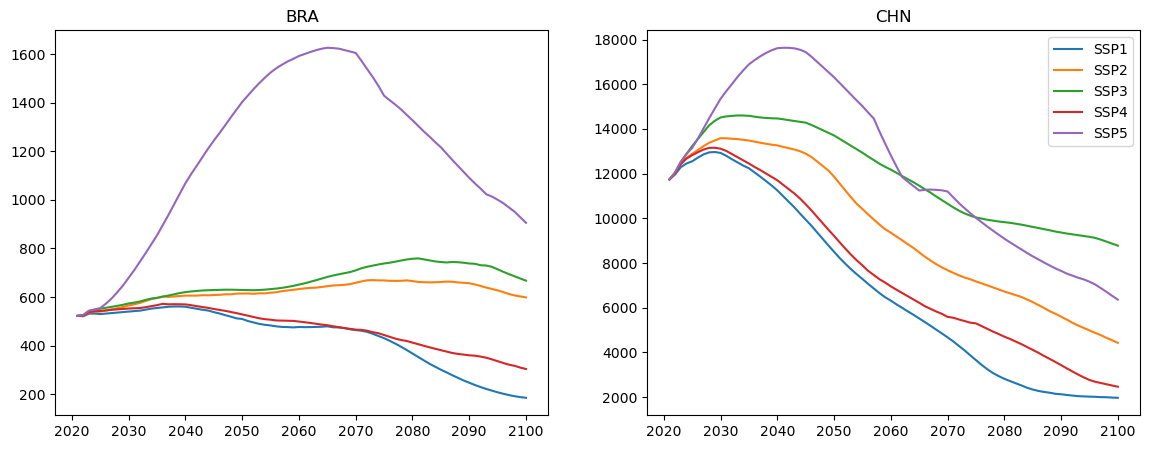

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for s_i, s in enumerate(np.array(xr_dataread.Scenario)):
    ax1.plot(xr_dataread.Time, xr_dataread.CO2_base.sel(Region="BRA", Scenario=s), label=s)
    ax2.plot(xr_dataread.Time, xr_dataread.CO2_base.sel(Region="CHN", Scenario=s), label=s)
plt.legend()
ax1.set_title("BRA")
ax2.set_title("CHN")

In [39]:
xr_alloc_2030 = xr.open_dataset("X:/user/dekkerm/Projects/ECEMF_T5.2/Data/xr_alloc_2030.nc")

In [46]:
# Read RCI
df_rci = pd.read_csv("X:/user/dekkerm/Data/RCI/RCI.xls", delimiter="\t", skiprows=30)[:-2]
df_rci = df_rci[["iso3", "year", "rci"]]
df_rci["year"] = df_rci["year"].astype(int)
df_rci = df_rci.rename(columns={"iso3": "Region", "year": "Time"})
dfdummy = df_rci.set_index(["Region", "Time"])
xr_rci = xr.Dataset.from_dataframe(dfdummy)
# xr_rci = xr_rci.reindex({"Region": self.xr_total.Region})

In [48]:
xr_rci.sel(Region="CHN", Time=2030)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    Region   <U3 'CHN'
    Time     int64 2030
Data variables:
    rci      float64 0.1452

In [49]:
xr_rci.sel(Region="BRA", Time=2030)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    Region   <U3 'BRA'
    Time     int64 2030
Data variables:
    rci      float64 0.01956

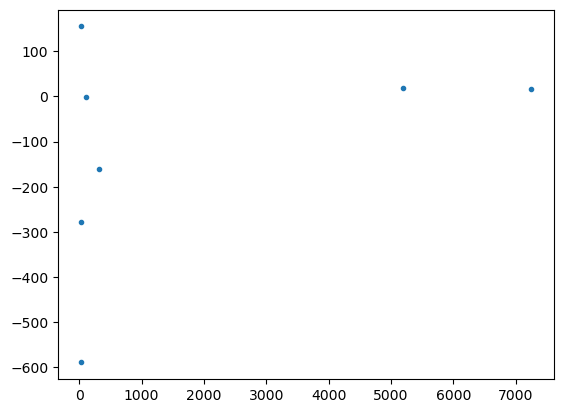

In [43]:
plt.plot(
    xr_dataread.CO2_base.sel(Time=2030, Scenario="SSP2"),
    xr_alloc_2030.sel(
        NegEmis=0.5, TrajUnc="Median", Temperature=1.5, Risk=0.5, Scenario="SSP2", NonCO2=0.5
    ).GDR,
    ".",
)